# ニューラルネットワーク

In [1]:
import sys, os
sys.path.append('deep-learning-from-scratch')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

## 様々な活性化関数

### ステップ関数

しきい値を超えると値が変化する

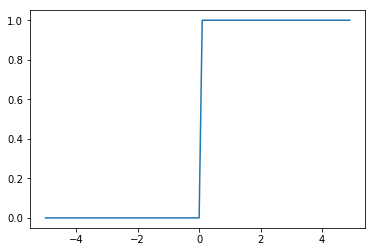

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.show()

### シグモイド関数

ステップ関数に対して滑らからに値が増加する

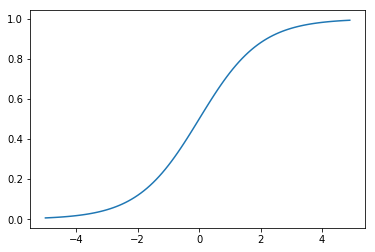

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

###  シグモイド関数とステップ関数の違い

NNにおいてはこの滑らかさが重要。
どんな値でも０〜１に収められるのも両者の共通点

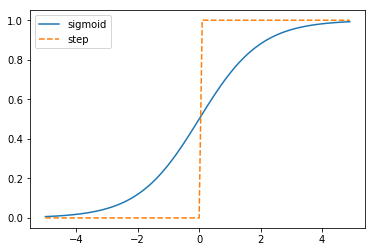

In [4]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, label='step', linestyle='--')
plt.legend()

plt.show()

## ReLU(Rectified Liner Unit)関数

入力が0以上ならそのまま返して、それ以下なら0を返す関数。
NNでは最近これが用いられることが多い

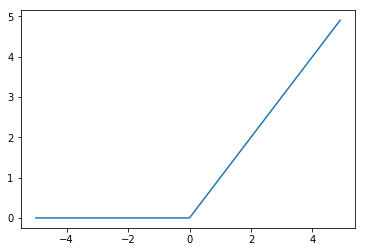

In [5]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y = relu(x)

plt.plot(x, y)
plt.show()

## 各層における信号伝達の実装


In [6]:
def init_network():
    return {
        'W1': np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]),
        'b1': np.array([0.1, 0.2, 0.3]),
        'W2': np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]),
        'b2': np.array([0.1, 0.2]),
        'W3': np.array([[0.1, 0.3], [0.2, 0.4]]),
        'b3': np.array([0.1, 0.2])
    }
    
def identity_function(x):
    return x
    
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層目
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    # 2層目
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    # 3層目
    a3 = np.dot(z2, W3) + b3
    x3 = identity_function(a3)
    
    # 出力層
    y = identity_function(a3)
    return y
    
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


## 出力層の設計

解きたい問題によって、出力層に用いる活性化関数が変わる。

- 回帰問題: 恒等関数(identify_function)
- 分類問題: ソフトマックス関数

## ソフトマックス関数

総和が1になるため、それぞれの出力を確率として解釈することができる

In [7]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #e^a 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a # <-　ソフトマックス関数
    return y

a = np.arange(0, 3, 1)
softmax(a)
    

array([ 0.09003057,  0.24472847,  0.66524096])

## 手書き数字認識

MNISTデータセットをつかって数字の認識

In [8]:
from dataset.mnist import load_mnist

(x_train, y_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [9]:
print("train:", x_train.shape)
print("test:", x_test.shape)

train: (60000, 784)
test: (10000, 784)


In [10]:
def display(img_array):
    one_image = img_array.reshape(28,28)
    plt.imshow(one_image, cmap=cm.binary)

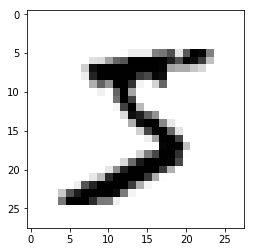

In [11]:
display(x_train[0])